In [1]:
# For classic ML models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


import numpy as np
import pandas as pd

# For deep learning models
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
data = pd.read_csv('./HeartDisease/2022/heart_2022_with_nans.csv')

# Display the first few rows to understand the structure
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [4]:
# Gain the unique value 
unique_values_per_column = {}
for column in data.columns:
    unique_values = data[column].unique()
    unique_values_per_column[column] = unique_values

# print unique value
for column, unique_values in unique_values_per_column.items():
    print(f"{column} unique values：{unique_values}")

State unique values：['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Sex unique values：['Female' 'Male']
GeneralHealth unique values：['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
PhysicalHealthDays unique values：[ 0.  2.  1.  8.  5. 30.  4. 23. 14. nan 15.  3. 10.  7. 25.  6. 21. 20.
 29. 16.  9. 27. 28. 12. 13. 11. 26. 17. 24. 19. 18. 22.]
MentalHealthDays unique values：[ 0.  3.  9.  5. 15. 20. 1

In [5]:
duplicates = data.duplicated()
print(duplicates.value_counts())

False    444975
True        157
Name: count, dtype: int64


In [6]:
duplicate_rows = data[data.duplicated(keep=False)]
print(duplicate_rows)

             State     Sex GeneralHealth  PhysicalHealthDays  \
4712        Alaska    Male     Very good                 0.0   
7310        Alaska    Male     Very good                 0.0   
10696      Arizona  Female     Excellent                 0.0   
11503      Arizona  Female     Excellent                 0.0   
26789   California    Male     Excellent                 0.0   
...            ...     ...           ...                 ...   
428370   Wisconsin    Male          Good                 0.0   
431351   Wisconsin    Male          Good                 0.0   
431653   Wisconsin    Male     Excellent                 0.0   
433340     Wyoming  Female          Good                 0.0   
433508     Wyoming  Female          Good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
4712                 0.0  Within past year (anytime less than 12 months ...   
7310                 0.0  Within past year (anytime less than 12 months .

In [7]:
data_unique = data.drop_duplicates()
print(data_unique.shape[0])

444975


In [8]:
original_row_count = data_unique.shape[0]

data_cleaned = data_unique.dropna()

# check the cleaned rows
cleaned_row_count = data_cleaned.shape[0]
print(f"remain rows: {cleaned_row_count}")

# accumluate the deleted rows
deleted_row_count = original_row_count - cleaned_row_count
print(f"deleted rows: {deleted_row_count}")

remain rows: 246013
deleted rows: 198962


In [9]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  HadAngina                  246013 non-null  object 
 11  HadStroke                  246013 non-null  object 
 12  HadAsthma                  246013 non-null  object 
 13  HadSkinCancer              24601

In [10]:
for col in data_cleaned.columns:
    # check data types
    if data_cleaned[col].dtype == 'object':
        unique_values = data_cleaned[col].unique()
        print(f"Column '{col}' unique values: {unique_values}")

Column 'State' unique values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Column 'Sex' unique values: ['Female' 'Male']
Column 'GeneralHealth' unique values: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
Column 'LastCheckupTime' unique values: ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 year

In [11]:
data_cleaned.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000
mean,4.119055,4.167292,7.021312,1.705150,83.615522,28.668258
std,8.405803,8.102796,1.440698,0.106654,21.323232,6.514005
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


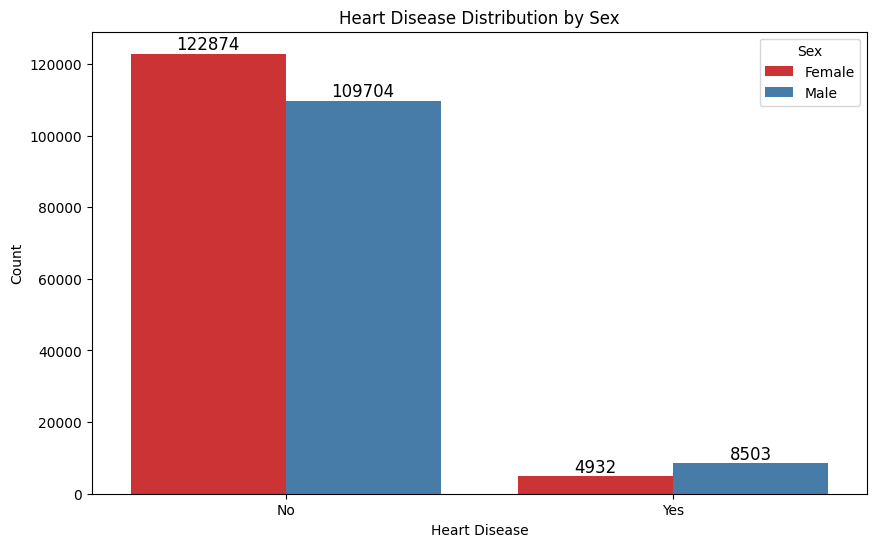

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data_cleaned, x='HadHeartAttack', hue='Sex', palette='Set1')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')

plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

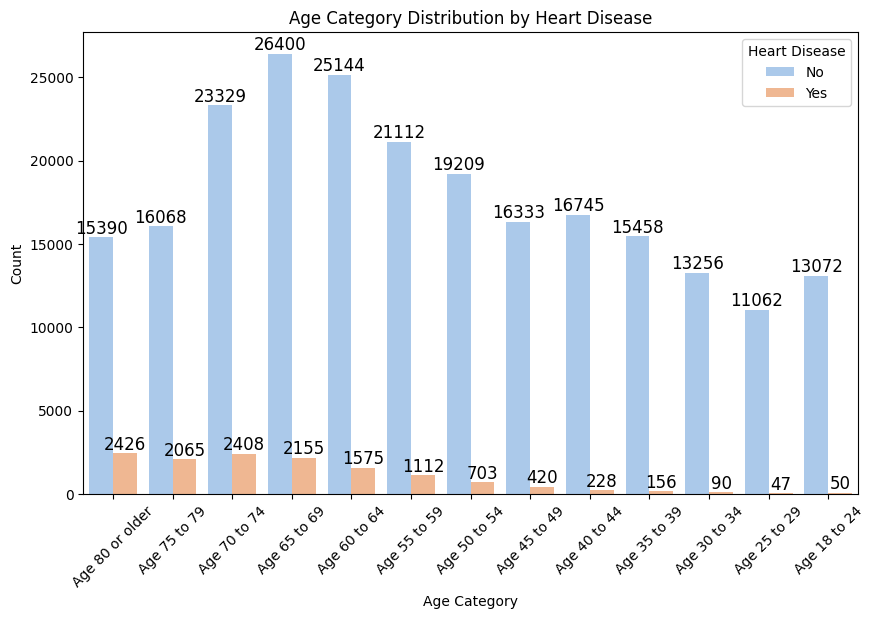

In [13]:
age_order = ['Age 80 or older', 'Age 75 to 79', 'Age 70 to 74', 'Age 65 to 69', 'Age 60 to 64', 'Age 55 to 59', 
             'Age 50 to 54', 'Age 45 to 49', 'Age 40 to 44', 'Age 35 to 39', 'Age 30 to 34', 'Age 25 to 29', 'Age 18 to 24']
plt.figure(figsize=(10, 6))
ax =sns.countplot(data_cleaned, x='AgeCategory', hue='HadHeartAttack', palette='pastel', order=age_order)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')
plt.title('Age Category Distribution by Heart Disease')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.show()

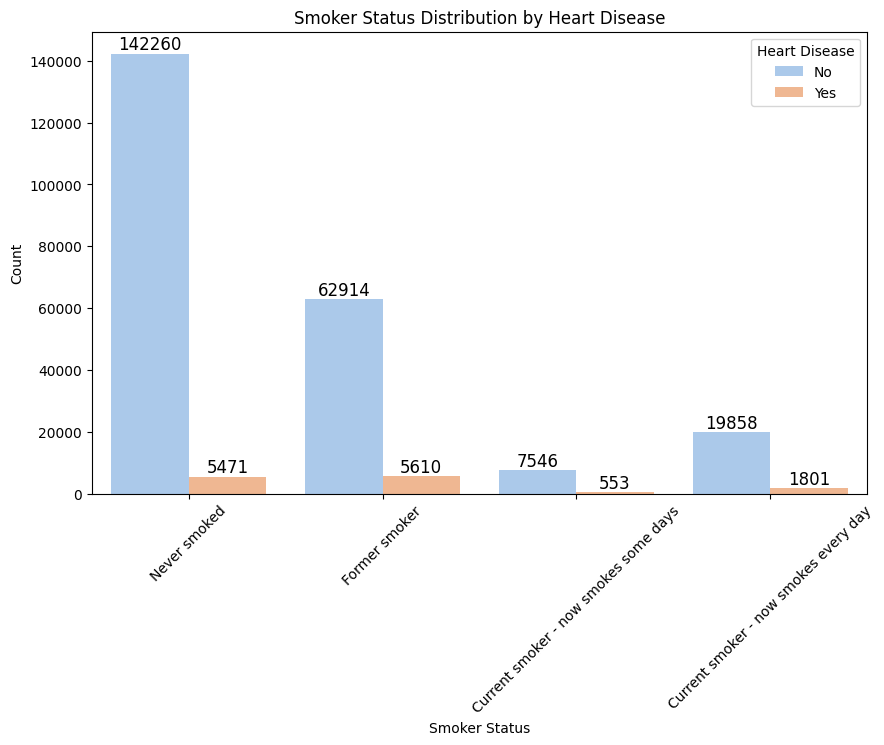

In [14]:
smoker_status_order = ['Never smoked', 'Former smoker', 'Current smoker - now smokes some days', 'Current smoker - now smokes every day']

plt.figure(figsize=(10, 6))
ax = sns.countplot(data_cleaned, x='SmokerStatus', hue='HadHeartAttack', palette='pastel', order=smoker_status_order)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')
    
plt.title('Smoker Status Distribution by Heart Disease')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.show()

In [15]:
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

categorical_columns_list = categorical_columns.tolist()
list = ['State', 'Sex', 'HadHeartAttack', 'SmokerStatus', 'AgeCategory', 'ECigaretteUsage', 'HadDiabetes', 'RemovedTeeth', 'GeneralHealth']

for item in list:
    if item in categorical_columns_list:
        categorical_columns_list.remove(item)

In [16]:
print(categorical_columns_list)

['LastCheckupTime', 'PhysicalActivities', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'RaceEthnicityCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


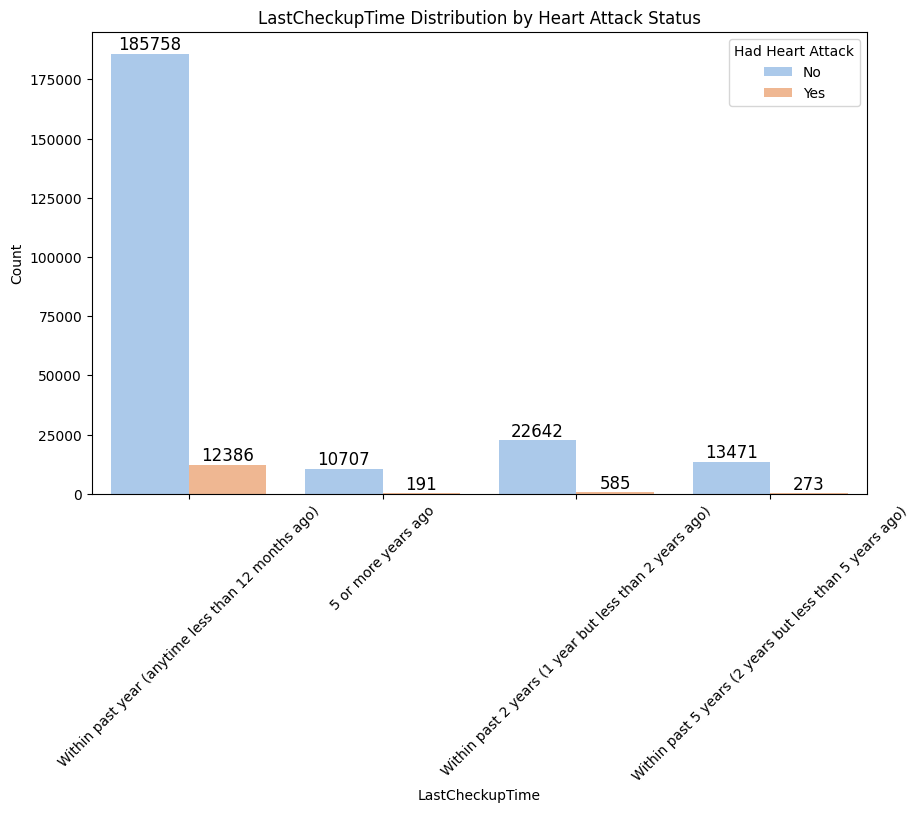

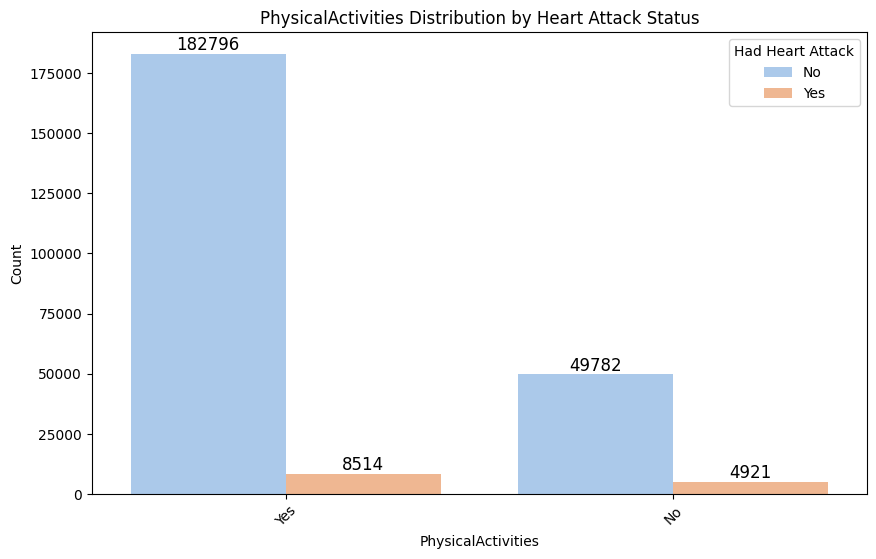

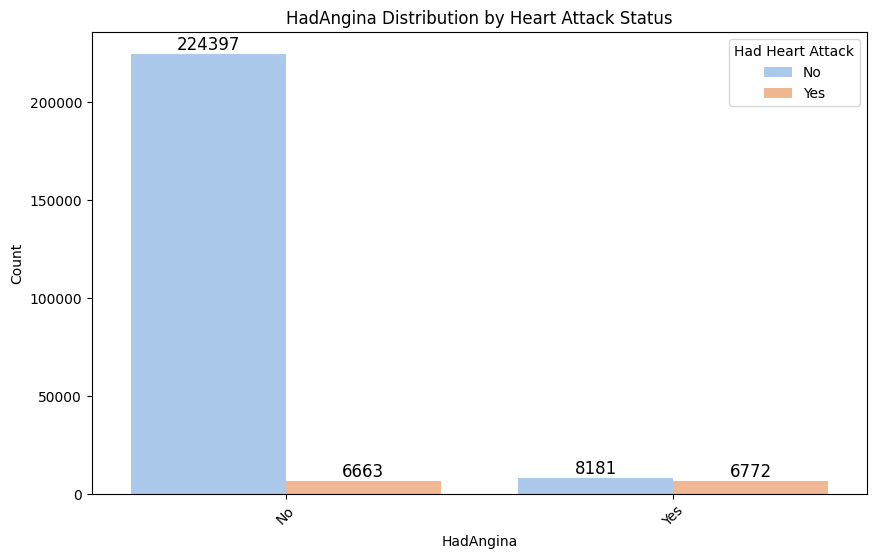

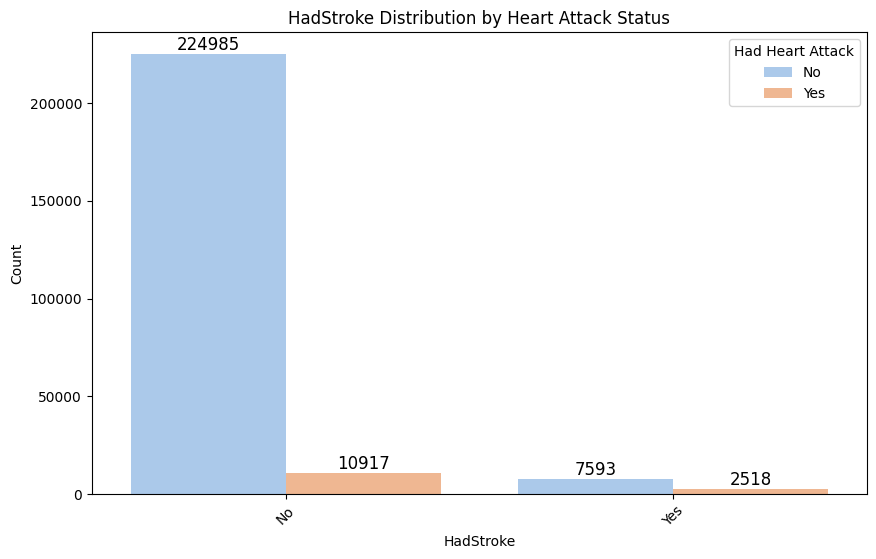

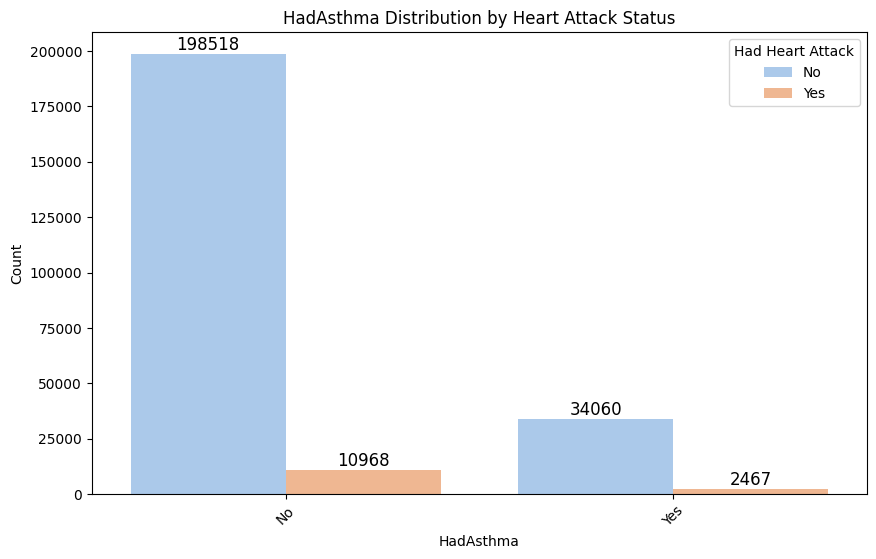

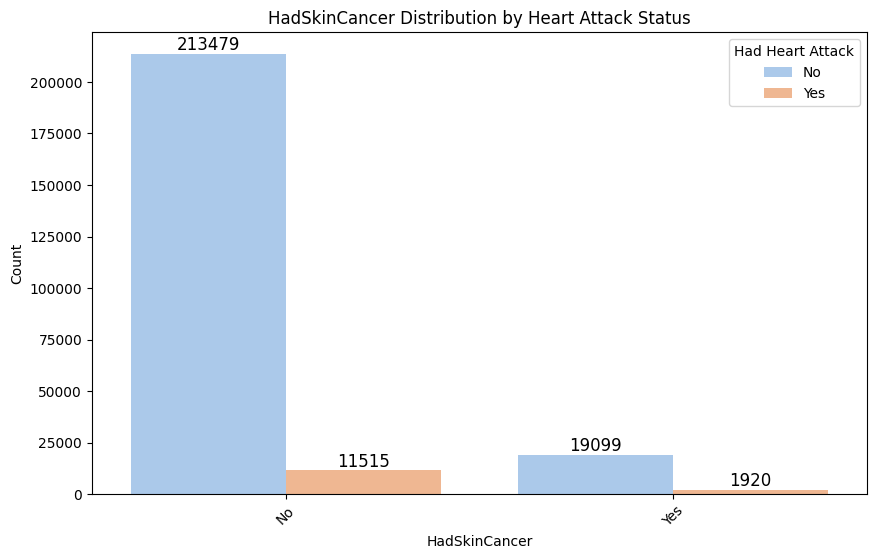

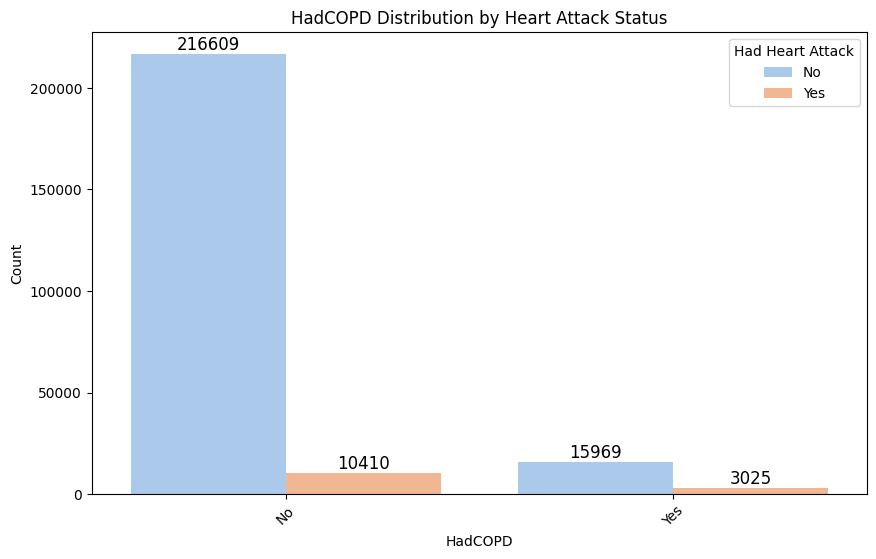

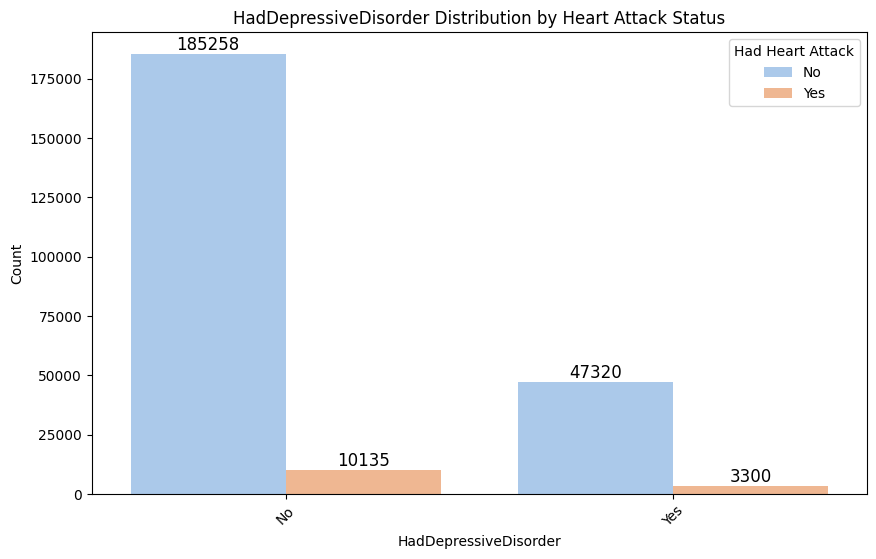

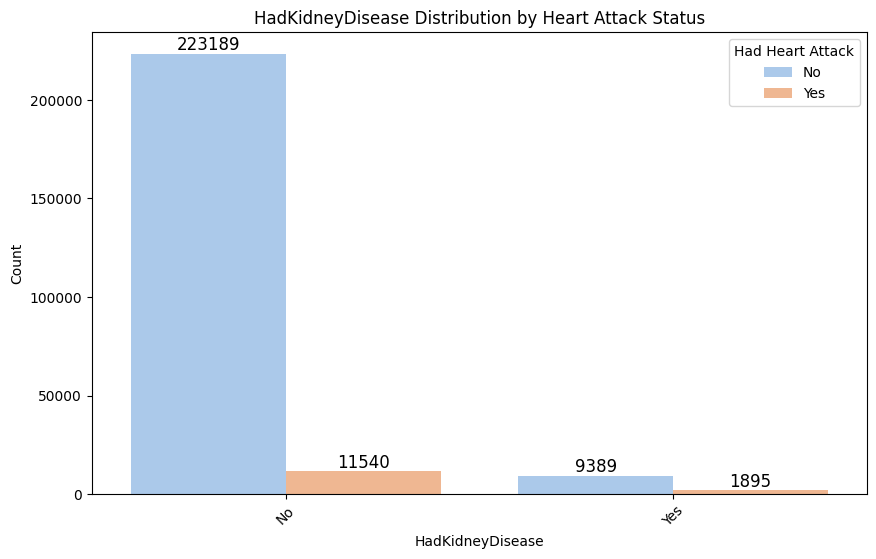

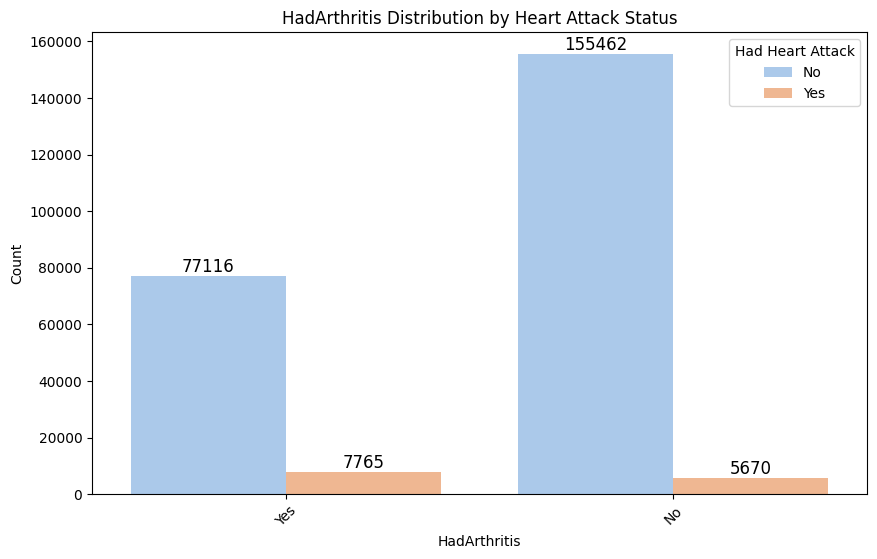

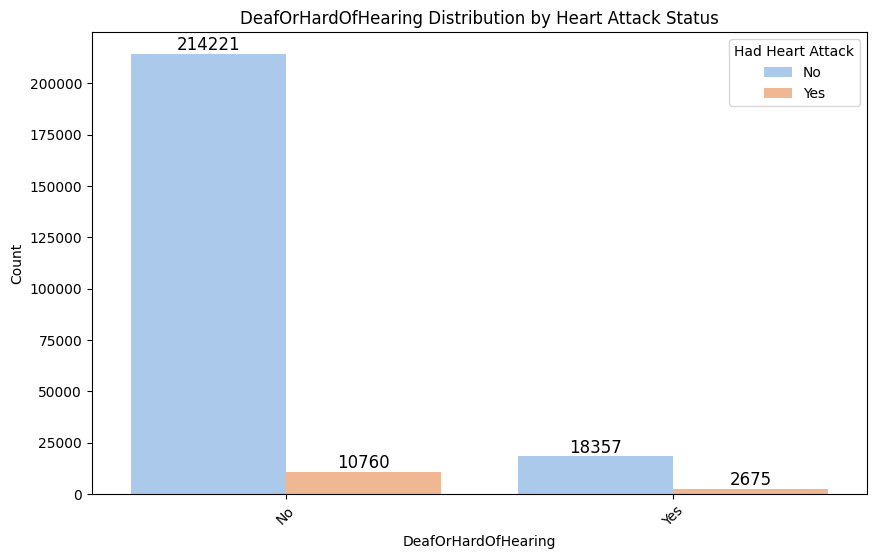

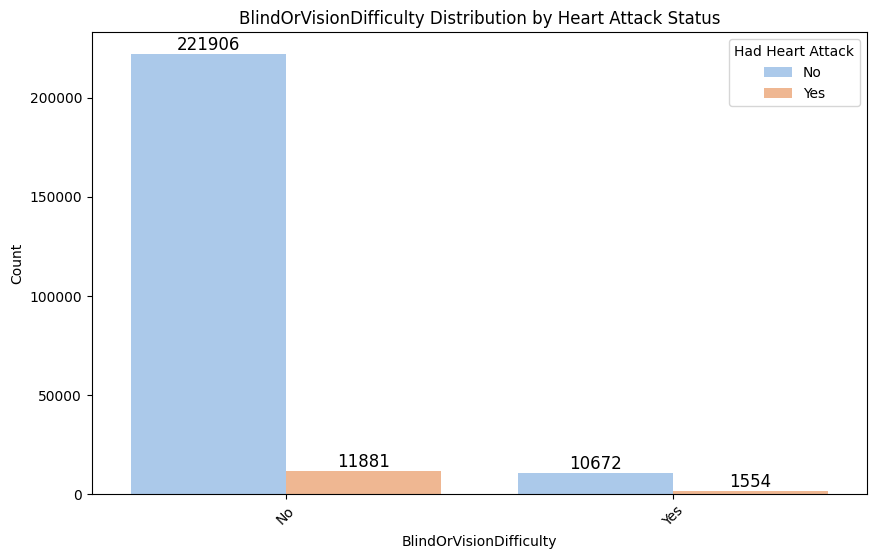

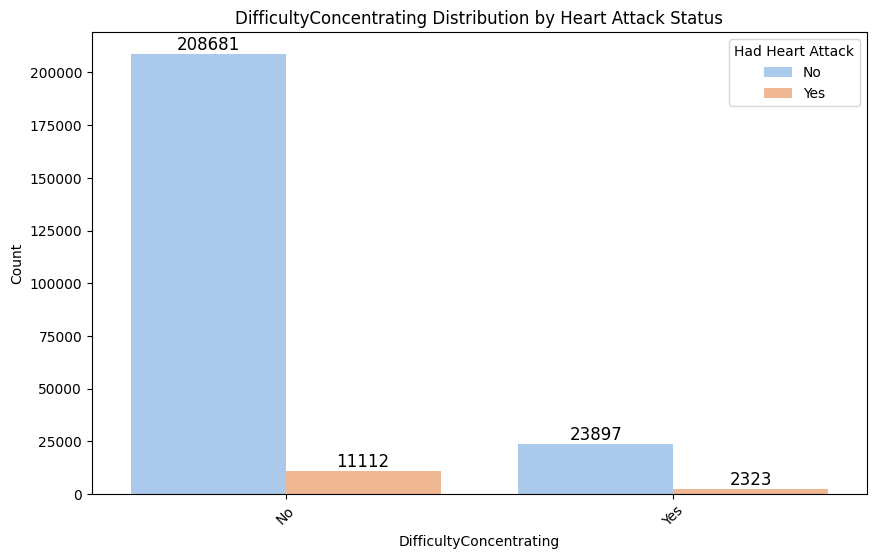

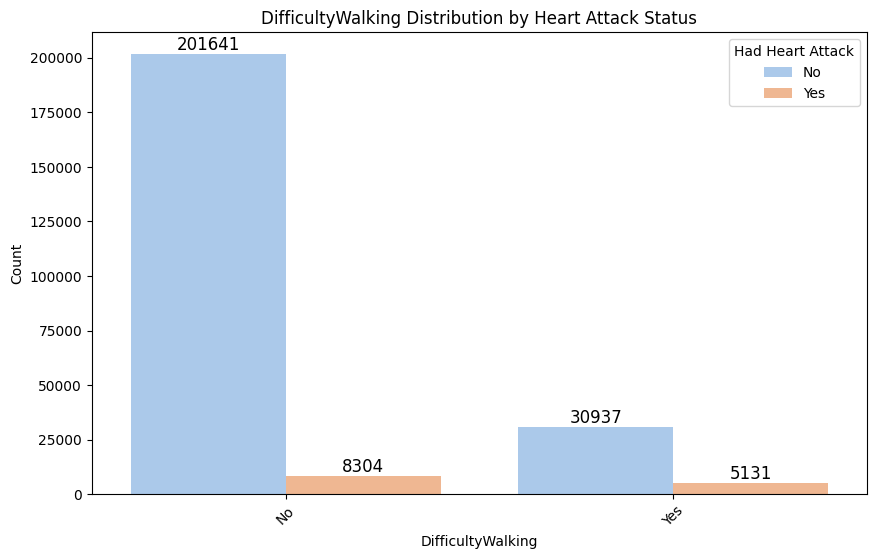

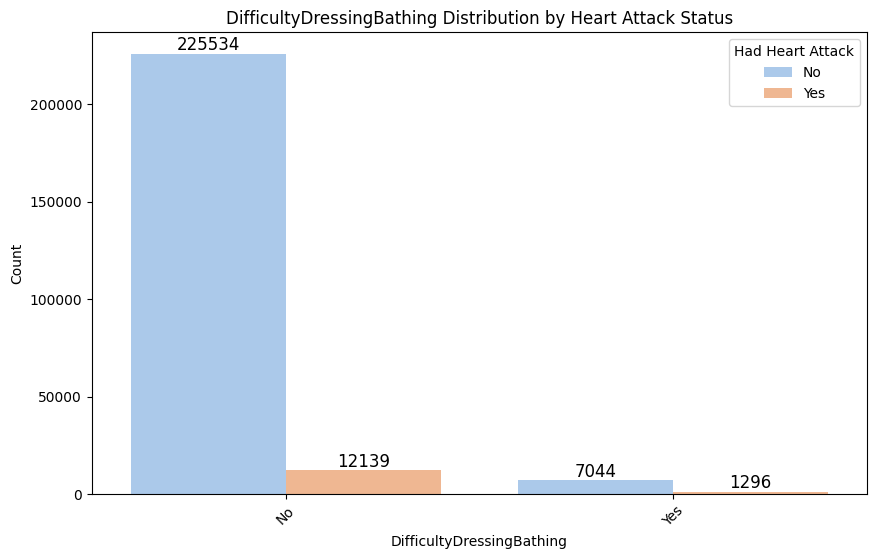

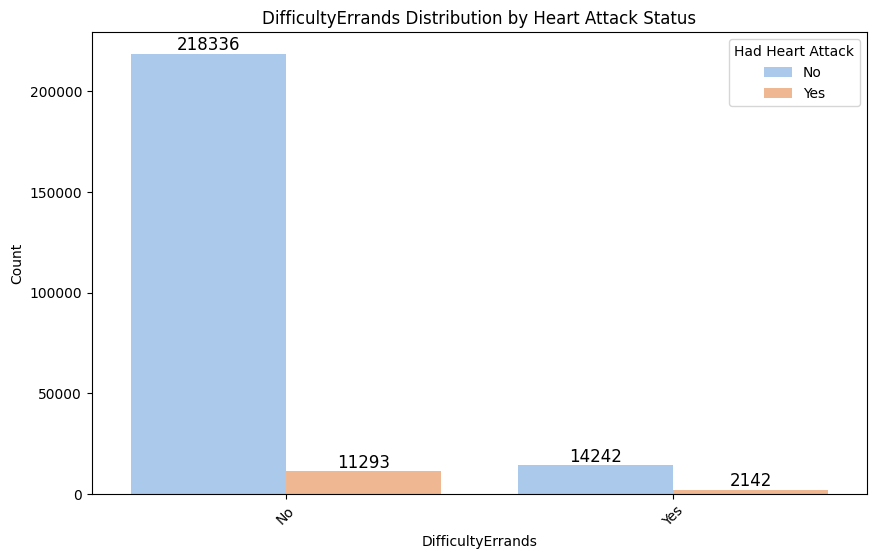

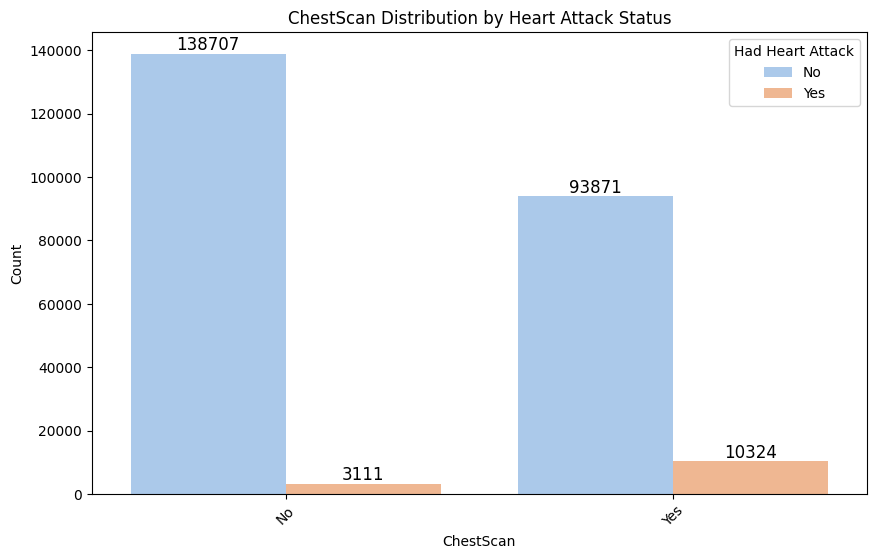

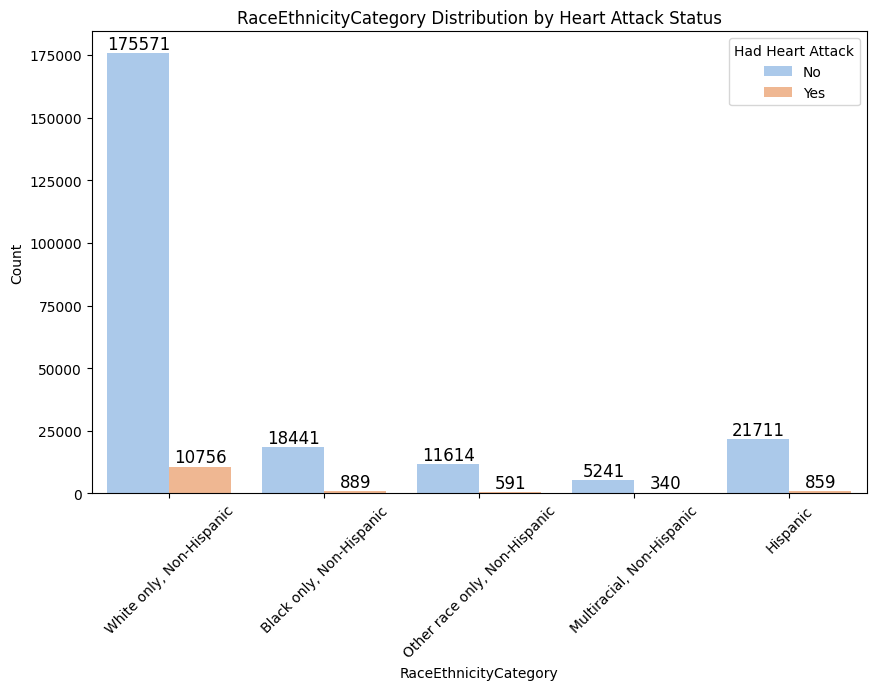

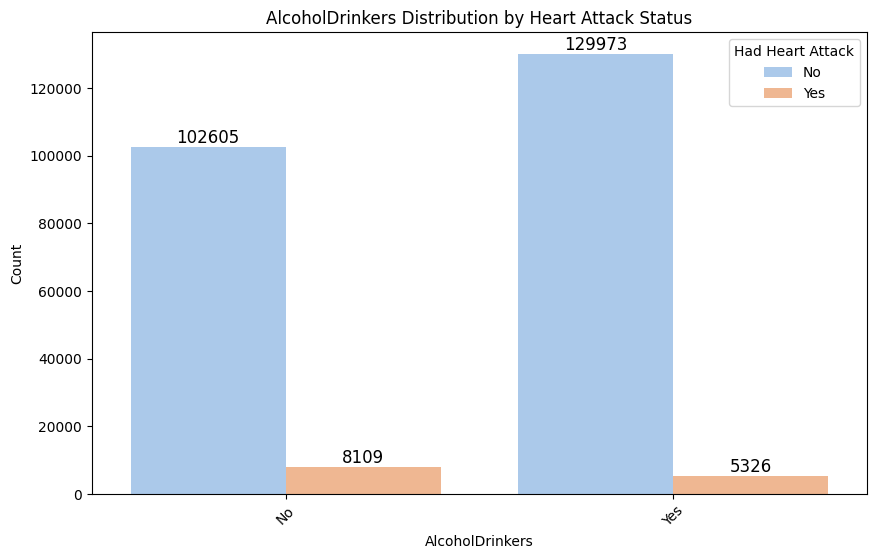

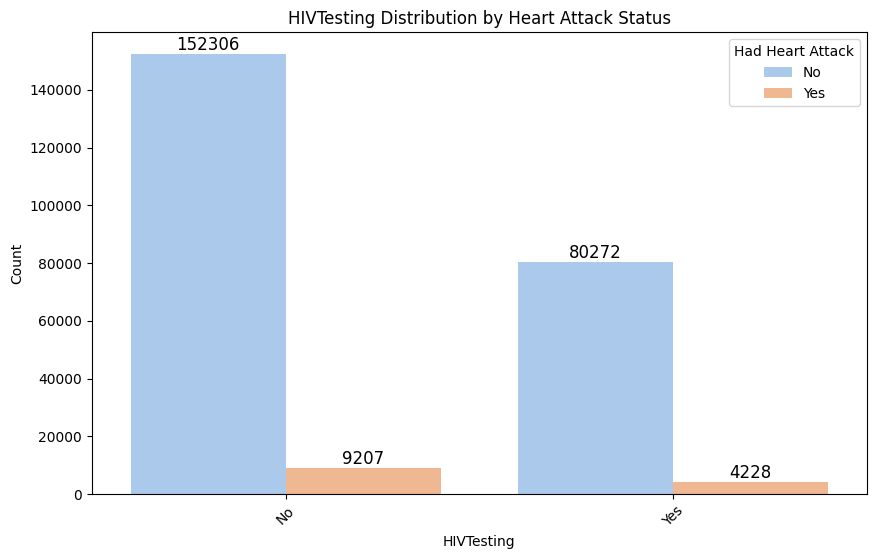

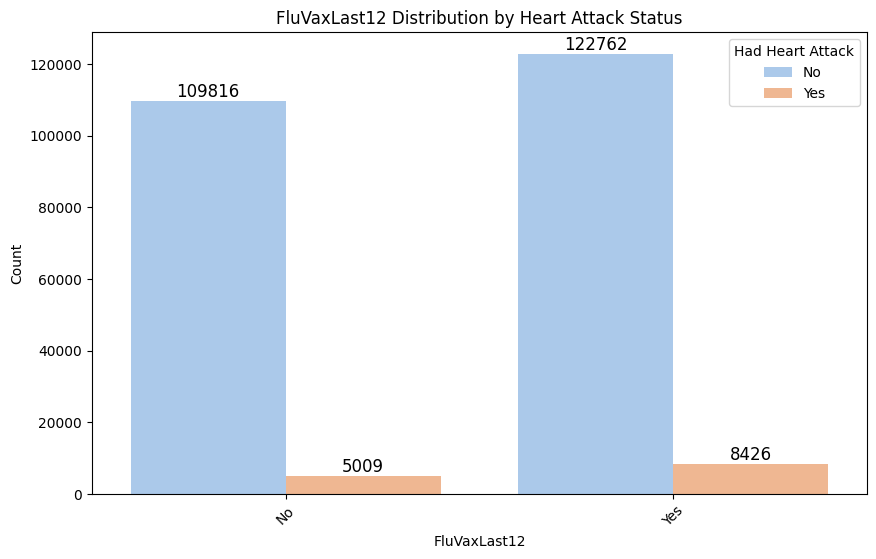

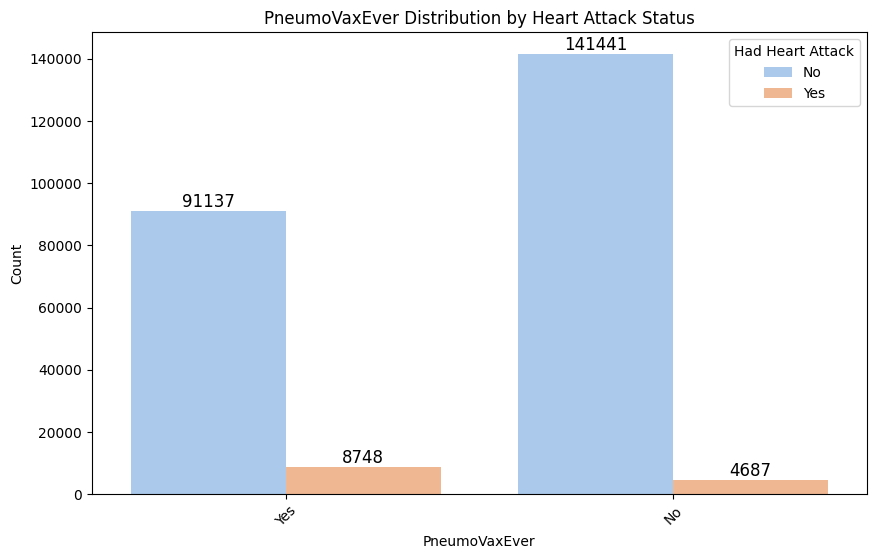

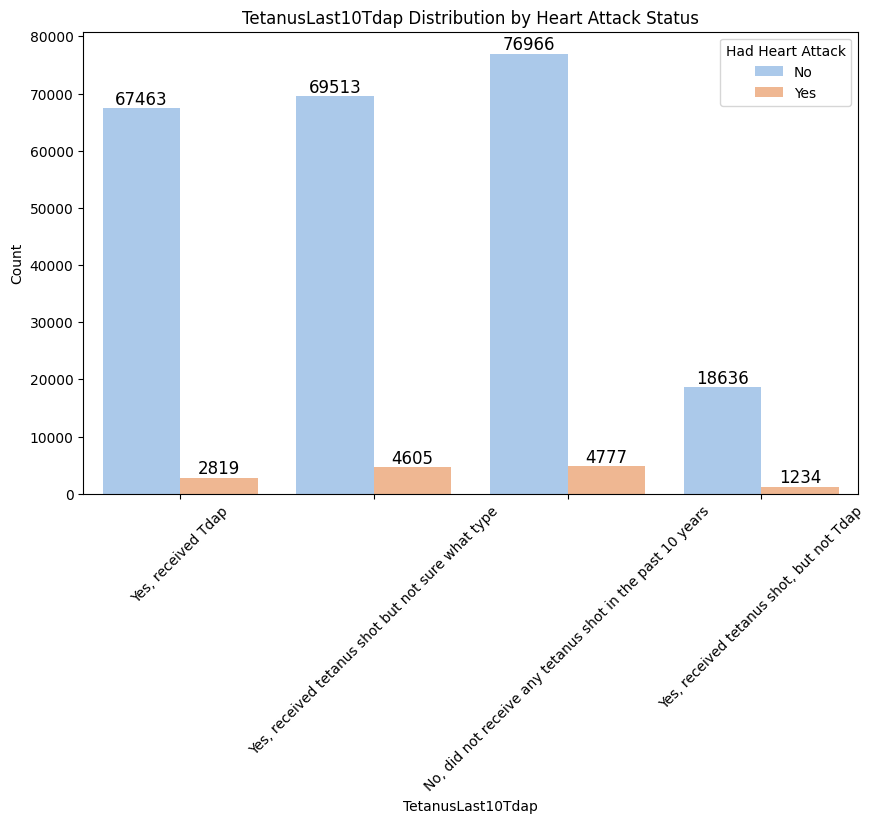

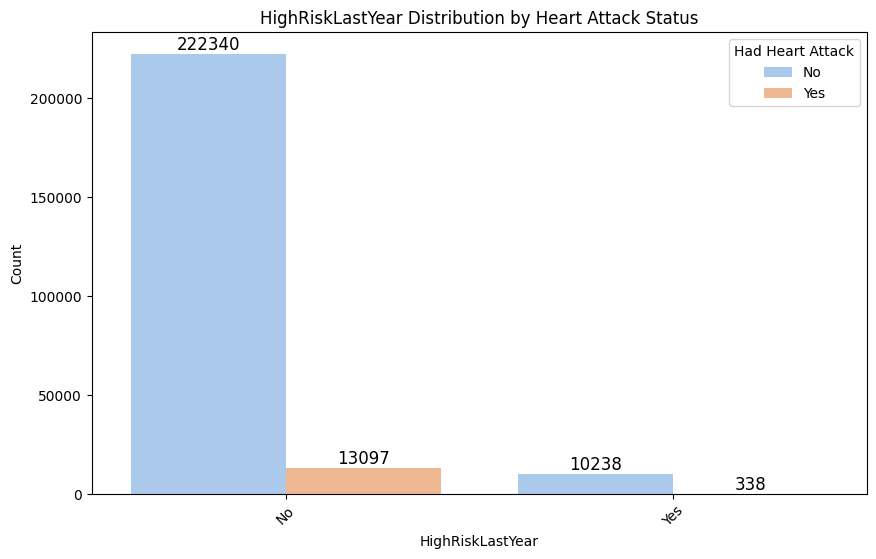

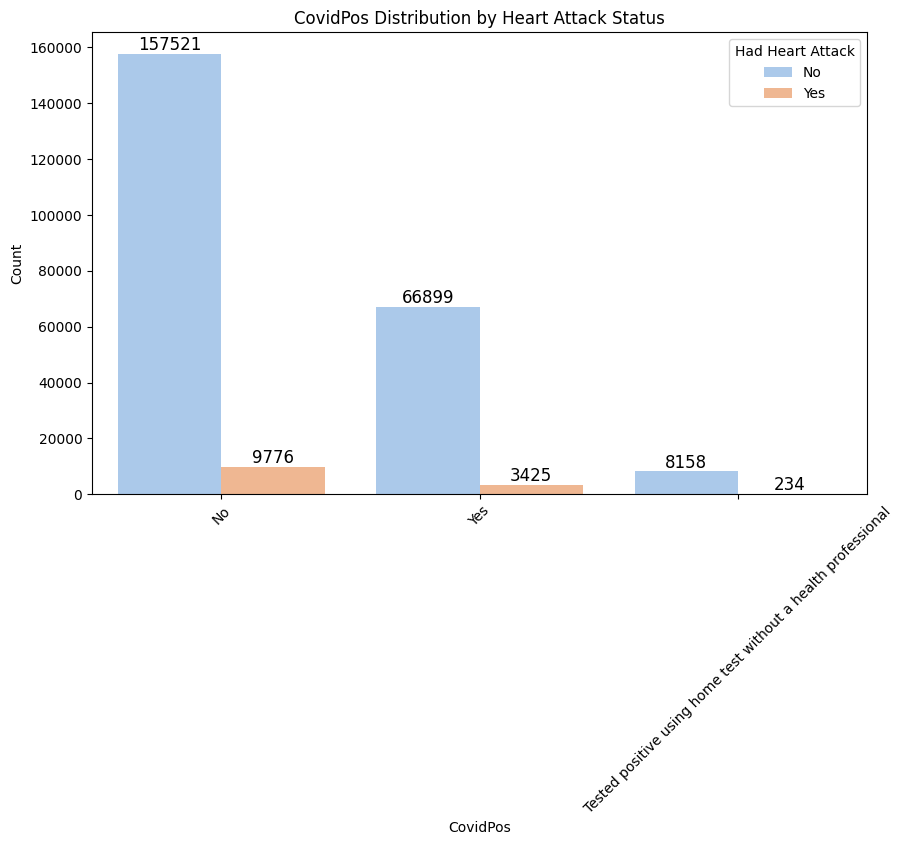

In [17]:
yes_no_order = ['No','Yes']
for column in categorical_columns_list:
    if column == 'FluVaxLast12':
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data_cleaned, x=column, hue='HadHeartAttack', palette='pastel',order=yes_no_order)
        for container in ax.containers:
            ax.bar_label(container, label_type='edge', fontsize=12, color='black')
        plt.title(f'{column} Distribution by Heart Attack Status')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Had Heart Attack')
        plt.xticks(rotation=45)
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data_cleaned, x=column, hue='HadHeartAttack', palette='pastel')
        for container in ax.containers:
            ax.bar_label(container, label_type='edge', fontsize=12, color='black')
        plt.title(f'{column} Distribution by Heart Attack Status')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Had Heart Attack')
        plt.xticks(rotation=45)  
        plt.show()

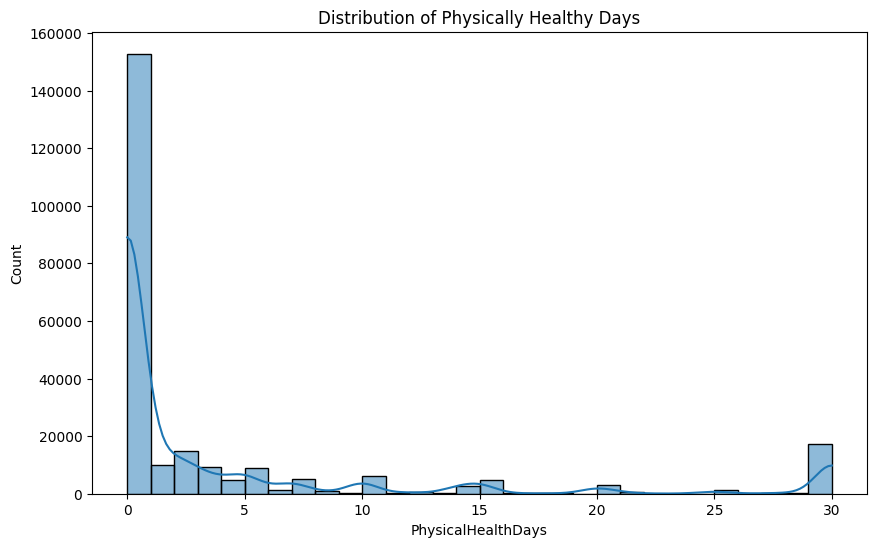

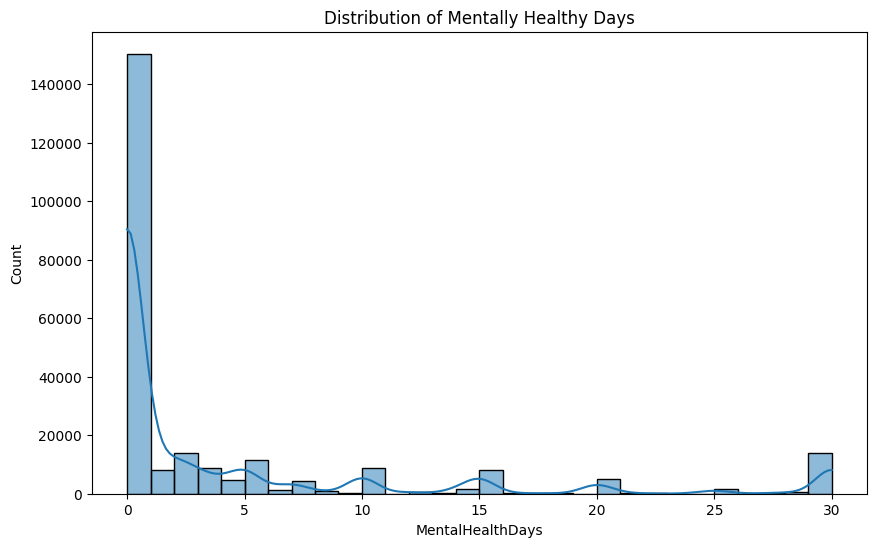

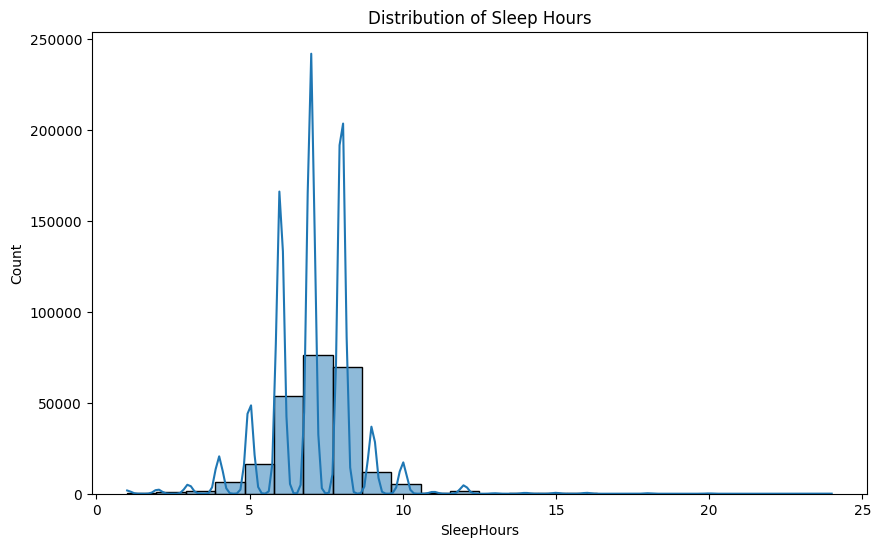

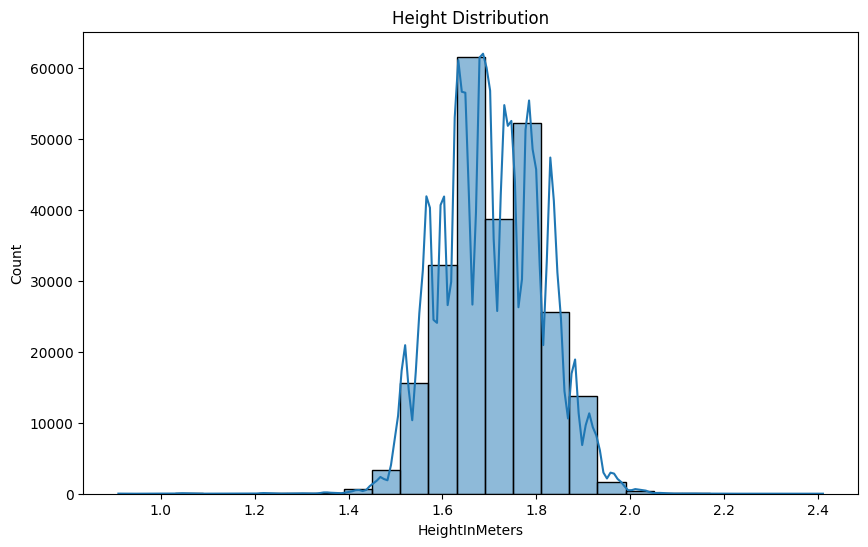

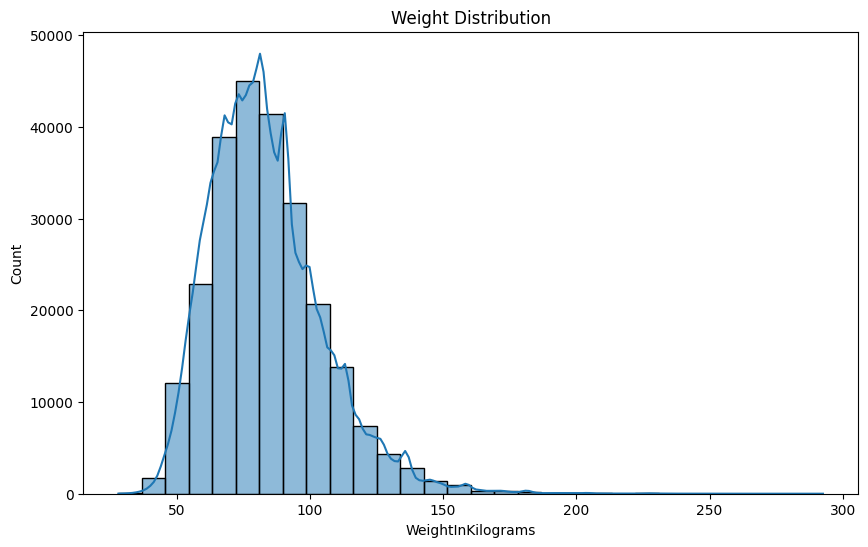

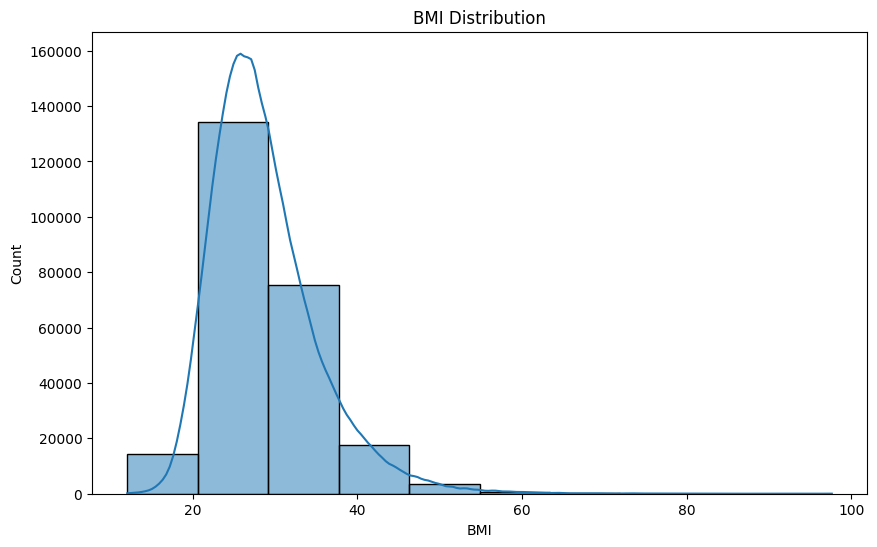

In [18]:
# Physical Health Days Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['PhysicalHealthDays'], kde=True, bins=30)
plt.title('Distribution of Physically Healthy Days')
plt.show()

# Mental Health Days Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['MentalHealthDays'], kde=True, bins=30)
plt.title('Distribution of Mentally Healthy Days')
plt.show()

# Sleep Hours Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['SleepHours'], kde=True, bins=24)
plt.title('Distribution of Sleep Hours')
plt.show()

# Height Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['HeightInMeters'], kde=True, bins=25)
plt.title('Height Distribution')
plt.show()

# Weight Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['WeightInKilograms'], kde=True, bins=30)
plt.title('Weight Distribution')
plt.show()

# BMI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['BMI'], kde=True, bins=10)
plt.title('BMI Distribution')
plt.show()

In [19]:
# mapping dictionary
state_mapping = {state: idx for idx, state in enumerate([
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
    'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
    'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
    'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
    'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
    'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico',
    'Virgin Islands'])}

sex_mapping = {'Female': 0, 'Male': 1}

general_health_mapping = {
    'Very good': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3, 'Poor': 4
}

last_checkup_time_mapping = {
    'Within past year (anytime less than 12 months ago)': 0,
    '5 or more years ago': 1,
    'Within past 2 years (1 year but less than 2 years ago)': 2,
    'Within past 5 years (2 years but less than 5 years ago)': 3
}

physical_activities_mapping = {'Yes': 1, 'No': 0}

removed_teeth_mapping = {
    'None of them': 0, '6 or more, but not all': 1, '1 to 5': 2, 'All': 3
}

yes_no_mapping = {'Yes': 1, 'No': 0}

had_diabetes_mapping = {
    'No': 0, 'Yes': 1, 
    'Yes, but only during pregnancy (female)': 2, 
    'No, pre-diabetes or borderline diabetes': 3
}

smoker_status_mapping = {
    'Former smoker': 0, 'Never smoked': 1, 
    'Current smoker - now smokes every day': 2,
    'Current smoker - now smokes some days': 3
}

e_cigarette_usage_mapping = {
    'Never used e-cigarettes in my entire life': 0,
    'Use them some days': 1, 'Not at all (right now)': 2,
    'Use them every day': 3
}

race_ethnicity_mapping = {
    'White only, Non-Hispanic': 0, 'Black only, Non-Hispanic': 1,
    'Other race only, Non-Hispanic': 2, 'Multiracial, Non-Hispanic': 3,
    'Hispanic': 4
}

age_category_mapping = {
    'Age 18 to 24': 0, 'Age 25 to 29': 1, 'Age 30 to 34': 2, 'Age 35 to 39': 3,
    'Age 40 to 44': 4, 'Age 45 to 49': 5, 'Age 50 to 54': 6, 'Age 55 to 59': 7,
    'Age 60 to 64': 8, 'Age 65 to 69': 9, 'Age 70 to 74': 10, 'Age 75 to 79': 11,
    'Age 80 or older': 12
}

tetanus_last_10_td_mapping = {
    'Yes, received Tdap': 0, 'Yes, received tetanus shot but not sure what type': 1,
    'No, did not receive any tetanus shot in the past 10 years': 2,
    'Yes, received tetanus shot, but not Tdap': 3
}

covid_pos_mapping = {
    'No': 0, 'Yes': 1,
    'Tested positive using home test without a health professional': 2
}

data_cleaned.loc[:, 'State'] = data_cleaned['State'].map(state_mapping)
data_cleaned.loc[:, 'Sex'] = data_cleaned['Sex'].map(sex_mapping)
data_cleaned.loc[:, 'GeneralHealth'] = data_cleaned['GeneralHealth'].map(general_health_mapping)
data_cleaned.loc[:, 'LastCheckupTime'] = data_cleaned['LastCheckupTime'].map(last_checkup_time_mapping)
data_cleaned.loc[:, 'PhysicalActivities'] = data_cleaned['PhysicalActivities'].map(yes_no_mapping)
data_cleaned.loc[:, 'RemovedTeeth'] = data_cleaned['RemovedTeeth'].map(removed_teeth_mapping)
data_cleaned.loc[:, 'HadHeartAttack'] = data_cleaned['HadHeartAttack'].map(yes_no_mapping)
data_cleaned.loc[:, 'HadAngina'] = data_cleaned['HadAngina'].map(yes_no_mapping)
data_cleaned.loc[:, 'HadStroke'] = data_cleaned['HadStroke'].map(yes_no_mapping)
data_cleaned.loc[:, 'HadAsthma'] = data_cleaned['HadAsthma'].map(yes_no_mapping)
data_cleaned.loc[:, 'HadSkinCancer'] = data_cleaned['HadSkinCancer'].map(yes_no_mapping)
data_cleaned.loc[:, 'HadCOPD'] = data_cleaned['HadCOPD'].map(yes_no_mapping)
data_cleaned.loc[:, 'HadDepressiveDisorder'] = data_cleaned['HadDepressiveDisorder'].map(yes_no_mapping)
data_cleaned.loc[:, 'HadKidneyDisease'] = data_cleaned['HadKidneyDisease'].map(yes_no_mapping)
data_cleaned.loc[:, 'HadArthritis'] = data_cleaned['HadArthritis'].map(yes_no_mapping)
data_cleaned.loc[:, 'HadDiabetes'] = data_cleaned['HadDiabetes'].map(had_diabetes_mapping)
data_cleaned.loc[:, 'DeafOrHardOfHearing'] = data_cleaned['DeafOrHardOfHearing'].map(yes_no_mapping)
data_cleaned.loc[:, 'BlindOrVisionDifficulty'] = data_cleaned['BlindOrVisionDifficulty'].map(yes_no_mapping)
data_cleaned.loc[:, 'DifficultyConcentrating'] = data_cleaned['DifficultyConcentrating'].map(yes_no_mapping)
data_cleaned.loc[:, 'DifficultyWalking'] = data_cleaned['DifficultyWalking'].map(yes_no_mapping)
data_cleaned.loc[:, 'DifficultyDressingBathing'] = data_cleaned['DifficultyDressingBathing'].map(yes_no_mapping)
data_cleaned.loc[:, 'DifficultyErrands'] = data_cleaned['DifficultyErrands'].map(yes_no_mapping)
data_cleaned.loc[:, 'SmokerStatus'] = data_cleaned['SmokerStatus'].map(smoker_status_mapping)
data_cleaned.loc[:, 'ECigaretteUsage'] = data_cleaned['ECigaretteUsage'].map(e_cigarette_usage_mapping)
data_cleaned.loc[:, 'ChestScan'] = data_cleaned['ChestScan'].map(yes_no_mapping)
data_cleaned.loc[:, 'RaceEthnicityCategory'] = data_cleaned['RaceEthnicityCategory'].map(race_ethnicity_mapping)
data_cleaned.loc[:, 'AgeCategory'] = data_cleaned['AgeCategory'].map(age_category_mapping)
data_cleaned.loc[:, 'AlcoholDrinkers'] = data_cleaned['AlcoholDrinkers'].map(yes_no_mapping)
data_cleaned.loc[:, 'HIVTesting'] = data_cleaned['HIVTesting'].map(yes_no_mapping)
data_cleaned.loc[:, 'FluVaxLast12'] = data_cleaned['FluVaxLast12'].map(yes_no_mapping)
data_cleaned.loc[:, 'PneumoVaxEver'] = data_cleaned['PneumoVaxEver'].map(yes_no_mapping)
data_cleaned.loc[:, 'TetanusLast10Tdap'] = data_cleaned['TetanusLast10Tdap'].map(tetanus_last_10_td_mapping)
data_cleaned.loc[:, 'HighRiskLastYear'] = data_cleaned['HighRiskLastYear'].map(yes_no_mapping)
data_cleaned.loc[:, 'CovidPos'] = data_cleaned['CovidPos'].map(covid_pos_mapping)

print(data_cleaned.head())


    State Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
342     0   0             0                 4.0               0.0   
343     0   1             0                 0.0               0.0   
345     0   1             0                 0.0               0.0   
346     0   0             1                 5.0               0.0   
347     0   0             2                 3.0              15.0   

    LastCheckupTime PhysicalActivities  SleepHours RemovedTeeth  \
342               0                  1         9.0            0   
343               0                  1         6.0            0   
345               0                  0         8.0            1   
346               0                  1         9.0            0   
347               0                  1         5.0            2   

    HadHeartAttack  ... HeightInMeters WeightInKilograms    BMI  \
342              0  ...           1.60             71.67  27.99   
343              0  ...           1.78          

In [20]:
data_cleaned.to_csv('data_cleaned.csv', index=True)

In [21]:
data_cleaned.corr()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
State,1.000000,-0.006851,-0.000463,0.003396,-0.001007,-0.000192,-0.002935,0.003668,0.004420,-0.002737,...,-0.006441,0.009863,0.015228,-0.011510,-0.006134,-0.002179,0.002521,-0.015969,-0.010233,-0.006799
Sex,-0.006851,1.000000,0.017103,-0.044070,-0.091709,0.072615,0.059347,-0.015791,-0.004380,0.073317,...,0.693429,0.349414,0.007778,0.093821,-0.013286,-0.067476,-0.062687,0.043169,0.049911,-0.018523
GeneralHealth,-0.000463,0.017103,1.000000,0.177941,0.071717,0.003035,-0.083199,-0.007908,0.031767,0.055661,...,-0.002517,0.003201,0.006350,-0.064787,0.022577,-0.030785,-0.000229,0.025716,0.006297,-0.010608
PhysicalHealthDays,0.003396,-0.044070,0.177941,1.000000,0.306807,-0.064136,-0.240854,-0.056058,0.129416,0.133422,...,-0.049188,0.077495,0.116899,-0.129347,0.055660,0.016741,0.101220,0.027102,0.005226,0.017702
MentalHealthDays,-0.001007,-0.091709,0.071717,0.306807,1.000000,0.041575,-0.110528,-0.130095,0.020970,0.025888,...,-0.056011,0.042434,0.082174,-0.025979,0.124787,-0.057810,-0.025408,-0.011330,0.114207,0.035638
LastCheckupTime,-0.000192,0.072615,0.003035,-0.064136,0.041575,1.000000,0.035738,-0.045002,-0.072961,-0.065563,...,0.064207,-0.016530,-0.052734,0.055221,0.008143,-0.188540,-0.180279,0.038110,0.050754,0.007949
PhysicalActivities,-0.002935,0.059347,-0.083199,-0.240854,-0.110528,0.035738,1.000000,0.003188,-0.143708,-0.083186,...,0.089834,-0.093818,-0.158914,0.157835,0.018491,0.030796,-0.051430,-0.087365,0.017671,0.027701
SleepHours,0.003668,-0.015791,-0.007908,-0.056058,-0.130095,-0.045002,0.003188,1.000000,-0.003086,0.003634,...,-0.011380,-0.054683,-0.054744,-0.003553,-0.074161,0.066831,0.060522,0.003388,-0.043794,-0.038250
RemovedTeeth,0.004420,-0.004380,0.031767,0.129416,0.020970,-0.072961,-0.143708,-0.003086,1.000000,0.118735,...,-0.057856,0.035099,0.072709,-0.145927,-0.023103,0.020701,0.137120,0.094947,-0.040676,-0.058253
HadHeartAttack,-0.002737,0.073317,0.055661,0.133422,0.025888,-0.065563,-0.083186,0.003634,0.118735,1.000000,...,0.023059,0.038432,0.030409,-0.074176,-0.014565,0.045242,0.119965,0.030774,-0.021129,-0.028367


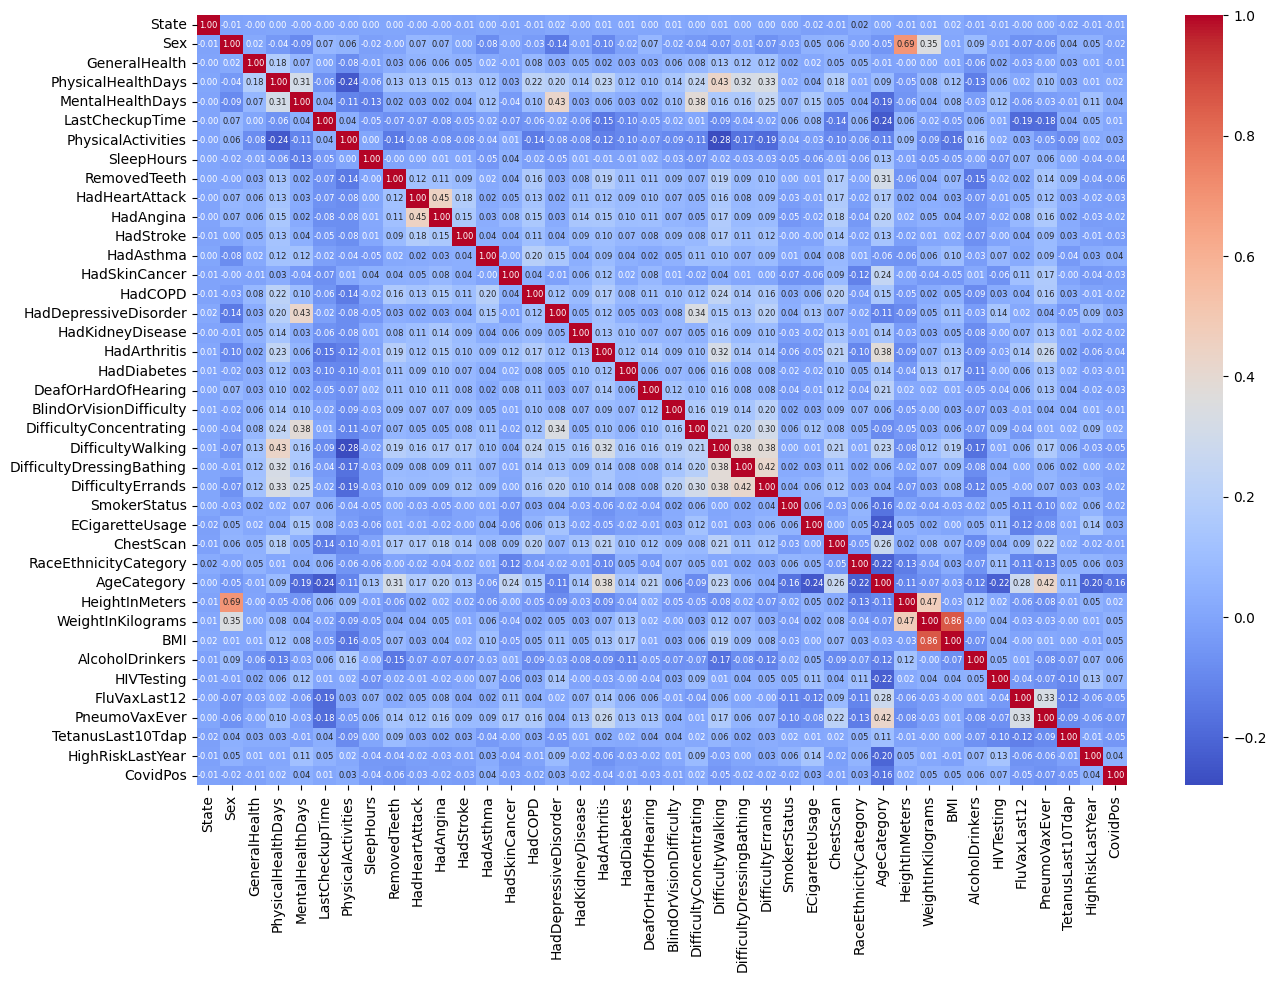

In [22]:
corr = data_cleaned.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 6}, ax=ax)

plt.show()

In [26]:
# Load the dataset
data = pd.read_csv('data_cleaned.csv')

# Display the first few rows to understand the structure
data.head()

,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,342,0,0,0,4.0,0.0,0,1,9.0,0,...,1.60,71.67,27.99,0,0,1,1,0,0,0
1,343,0,1,0,0.0,0.0,0,1,6.0,0,...,1.78,95.25,30.13,0,0,1,1,1,0,0
2,345,0,1,0,0.0,0.0,0,0,8.0,1,...,1.85,108.86,31.66,1,0,0,1,2,0,1
3,346,0,0,1,5.0,0.0,0,1,9.0,0,...,1.70,90.72,31.32,0,0,1,1,2,0,1
4,347,0,0,2,3.0,15.0,0,1,5.0,2,...,1.55,79.38,33.07,0,0,1,1,2,0,0


In [27]:

corr = data.corr()
strong_correlation_cols = [col for col in corr.columns if corr.loc['HadHeartAttack', col] >= 0.05 and col != 'HadHeartAttack']

# Select features (X) and target (y)
X = data[strong_correlation_cols]
y = data['HadHeartAttack']

strong_correlation_cols

['Sex',
 'GeneralHealth',
 'PhysicalHealthDays',
 'RemovedTeeth',
 'HadAngina',
 'HadStroke',
 'HadCOPD',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'ChestScan',
 'AgeCategory',
 'PneumoVaxEver']

In [28]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"Warning: Column {col} is still of type 'object'. Attempting to convert.")
    data[col] = data[col].astype('int', errors='ignore')

#X = data.drop('HadHeartAttack', axis=1)
X = data[strong_correlation_cols]
y = data['HadHeartAttack'].astype('int')

In [29]:
x=data[strong_correlation_cols]
y=data['HadHeartAttack']

from imblearn.over_sampling import SMOTE

resampler = SMOTE()
x,y = resampler.fit_resample(x,y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print("train set features shape:", X_train.shape)
print("test set features shape:", X_test.shape)
print("train set objective shape:", y_train.shape)
print("test set objective shape:", y_test.shape)

train set features shape: (372124, 19)
test set features shape: (93032, 19)
train set objective shape: (372124,)
test set objective shape: (93032,)


In [ ]:
# 特征列（X）和目标列（y）
X = data_cleaned.drop(columns=['HadHeartAttack'])  # 所有列除了 HadHeartAttack
y = data_cleaned['HadHeartAttack']  # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出训练集和测试集的形状
print("训练集特征形状:", X_train.shape)
print("测试集特征形状:", X_test.shape)
print("训练集目标形状:", y_train.shape)
print("测试集目标形状:", y_test.shape)

In [ ]:
# 特征列（X）和目标列（y）
X = data_cleaned[strong_correlation_cols] # 所有列除了 HadHeartAttack
y = data_cleaned['HadHeartAttack']  # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出训练集和测试集的形状
print("训练集特征形状:", X_train.shape)
print("测试集特征形状:", X_test.shape)
print("训练集目标形状:", y_train.shape)
print("测试集目标形状:", y_test.shape)

In [ ]:
# Test Function 未测试是否可以运行，可能需要进行简单修改
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Display the results
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Heart Disease', 'Heart Disease'])
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    return accuracy 

In [ ]:
def remove_outliers_from_dataframe(df):
    
    for column in df.columns:
        if column in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
        
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

data_cleaned = remove_outliers_from_dataframe(data_unique)
print(data_cleaned.shape[0])